# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

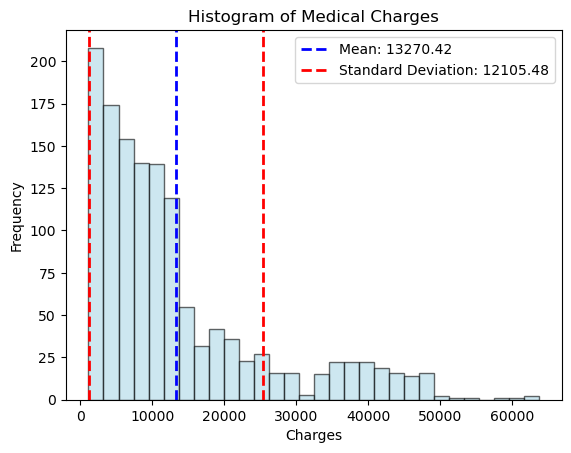

In [4]:
charges = medical['charges']

mean = np.mean(charges)
std_dev = np.std(charges)

# Histogram
plt.hist(charges, bins=30, alpha=.6, color='lightblue', edgecolor='black')

# Plot the mean and standard deviation
# If only one plt.axvline() has a label, the legend may not appear properly.
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(mean-std_dev, color='r', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean+std_dev, color='r', linestyle='dashed', linewidth=2)

# Add labels and legend
plt.title("Histogram of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.legend() # Ensure that legend is added

# Show the plot
plt.show()

This is a right skewed distribution.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This dataset has a large random sample size, we can address this question by using this dataset, **one-sided confidence interval** will be applied here.

In [6]:
# ???

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [9]:
# Calculate critical value at 95% confidence interval
n = medical['charges'].count()
t_critical = t.ppf(0.95, n-1).round(2)
print(t_critical)

1.65


In [13]:
# Calculate standard error, margin of error and lower bound of medical charge at 95% confidence interval
medical_ci = (round( mean - t_critical * (std_dev / np.sqrt(n)), 2), round( mean + t_critical * (std_dev / np.sqrt(n)), 2))
medical_ci

(12724.37, 13816.48)

In [14]:
#????

The standard error is 12105.48, mean medical charge is 13270.42, and the lower bound of medical charge with 95% confidence interval is 12724.37. Given the above three statistics, it is unlikely the administrator's concern is valid.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

***Assumptions of t-test:***
- Dependent variables are interval or ratio.
    1. If the dependent variable is temperature in Celsius -> Interval
    2. If the dependent variable is income in dollars -> Ratio
- The population from which samples are drawn is normally distributed
- Samples are randomly selected.
- The groups have equal variance (Homogeneity of variance)
- The t-statistic is robust (it is reasonably reliable even if assumptions are not fully met.)

***Hypothesis Testing:***
- H0: People with insurance are charged with the same amount as those without.
- H1: People with insurance are charged a different amount than those without.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [35]:
# We count how many insurance claim we have for each. Claim1 vs Claim2
count = medical.groupby('insuranceclaim')['charges'].count()
std_by_insurance = medical.groupby('insuranceclaim')['charges'].std()
mean = medical.groupby('insuranceclaim')['charges'].mean()

We have 555 for claim0 and 783 for claim1.

In [22]:
count

insuranceclaim
0    555
1    783
Name: charges, dtype: int64

In [42]:
n0 = count[0]
n1 = count[1]

s0 = std_by_insurance[0]
s1 = std_by_insurance[1]

x0 = mean[0]
x1 = mean[1]

In [44]:
sp = np.sqrt( ( (n0-1)*(s0**2) + (n1-1)*(s1**2)) / (n0+n1-2))
t = (x0-x1) / ( sp * np.sqrt(1/n0 + 1/n1))

print(f"The standard deviation of two groups: {sp:.2f}")
print(f"t-test statistic: {t:.2f}")

The standard deviation of two groups: 11520.03
t-test statistic: -11.89


In [55]:
from scipy import stats

group0 = medical.loc[medical['insuranceclaim']==0, 'charges']
group1 = medical.loc[medical['insuranceclaim']==1, 'charges']

t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=True)
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value}")

t-statistic: -11.89, p-value: 4.461230231620717e-31


In [59]:
#???? 查询tstatistic ttable 怎么查？

***p-value*** is way less than 0.05, and we will reject the null hypothesis ***H₀***. It means the observed data is very unlikely under the null hypothesis (***H₀***)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ After reviewing the documentation, we found that ztest() can be used to perform a z-test for hypothesis testing on a sample. And, we can conclude the same result that we will reject the null hypothesis since the p-value is much less than 0.05. Alternatively, people with insurance are charged a different amount than those without.

In [65]:
from statsmodels.stats.weightstats import ztest

z_stat, p_value = ztest(group0, group1)
print(f"z-test statistic: {z_stat:.2f}")
print(f"p-value: {p_value}")

z-test statistic: -11.89
p-value: 1.2823915835129942e-32


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test